# Iris dataset - Machine Learning and Statistics   Winter 23/24

## Author: David Higgins - G00411302     Atlantic Technological University

In [1]:
#import necessary packages for notebook

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Introduction

The Fisher Iris dataset, introduced by Sir Ronald A. Fisher in 1936, stands as a seminal contribution to the fields of data science and machine learning. This dataset, featuring 150 iris flower samples, holds a unique place in the annals of statistical and botanical research. Its primary purpose is to explore the feasibility of utilizing quantitative measurements—namely, sepal and petal dimensions—to accurately classify iris flowers into three distinct species: Iris setosa, Iris versicolor, and Iris virginica.

At its core, the dataset is elegantly simple. Each iris sample is characterized by four essential features: sepal length, sepal width, petal length, and petal width—each meticulously recorded in centimeters. These features serve as the foundation for supervised learning endeavors, where the challenge lies in building classification models that can discern the subtle botanical differences among iris species.

Beyond its historical significance, the Fisher Iris dataset continues to play a vital role in modern data science. It serves as a benchmark for evaluating classification algorithms, a canvas for data visualization and exploration, and a platform for teaching fundamental concepts in machine learning. In this project, we embark on a journey to unlock the dataset's insights and showcase its enduring relevance in the ever-evolving landscape of data analysis and predictive modeling.

## Literature Review

Placeholder for review of literature

## Supervised Learning

Supervised learning stands as a cornerstone in the landscape of machine learning, representing a foundational paradigm that underpins a myriad of real-world applications. This methodology, characterized by the presence of labeled training data, encapsulates the essence of learning from past experience to make informed predictions on unseen data points. In its fundamental form, supervised learning can be distilled into a process where algorithms learn to map input features to their corresponding output labels, effectively modeling the underlying data distribution.

Central to the efficacy of supervised learning is the concept of supervision, wherein the algorithm is provided with a ground truth, enabling it to discern the relationship between input and output variables. This supervision manifests through a training dataset comprising pairs of input instances and their associated labels, thereby affording the algorithm an opportunity to generalize from known patterns and make predictions on novel, unlabeled data. The overarching objective in supervised learning is to optimize the model's ability to capture the underlying patterns, fostering the creation of predictive models that can generalize effectively.

Supervised learning encompasses two primary categories: regression and classification. In regression tasks, the goal is to predict a continuous output variable, as exemplified in predicting housing prices based on various features. Conversely, classification tasks entail categorizing input data into predefined discrete classes or categories, as seen in image recognition or sentiment analysis. Classification algorithms, including logistic regression, decision trees, support vector machines, and neural networks, are pivotal components of the supervised learning arsenal, each offering distinct capabilities to tackle specific challenges.

The practical significance of supervised learning reverberates across diverse domains, ranging from natural language processing and computer vision to medical diagnosis and recommendation systems. Its versatility and adaptability have rendered it indispensable in harnessing the power of data to drive decision-making, providing a fertile ground for research, innovation, and the development of intelligent systems. In sum, supervised learning constitutes an indispensable pillar in the realm of machine learning, serving as the bedrock upon which data-driven insights and predictive models are constructed, propelling the field towards ever-expanding horizons.

In [2]:
#load the dataset from sklearn
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


## Exploratory Data Analysis

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%  

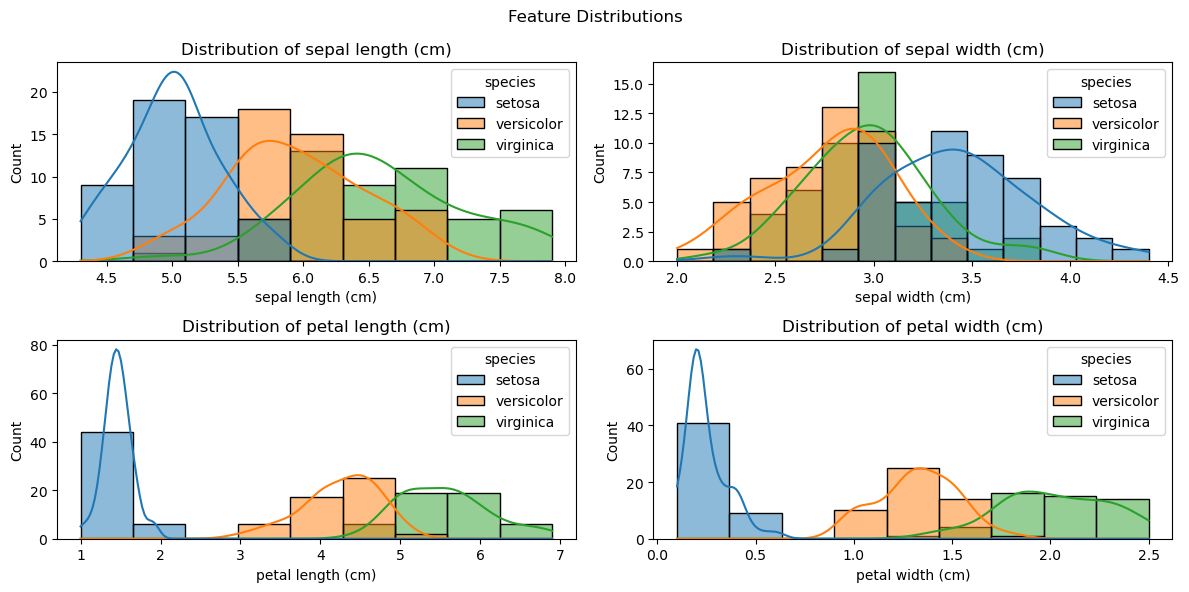

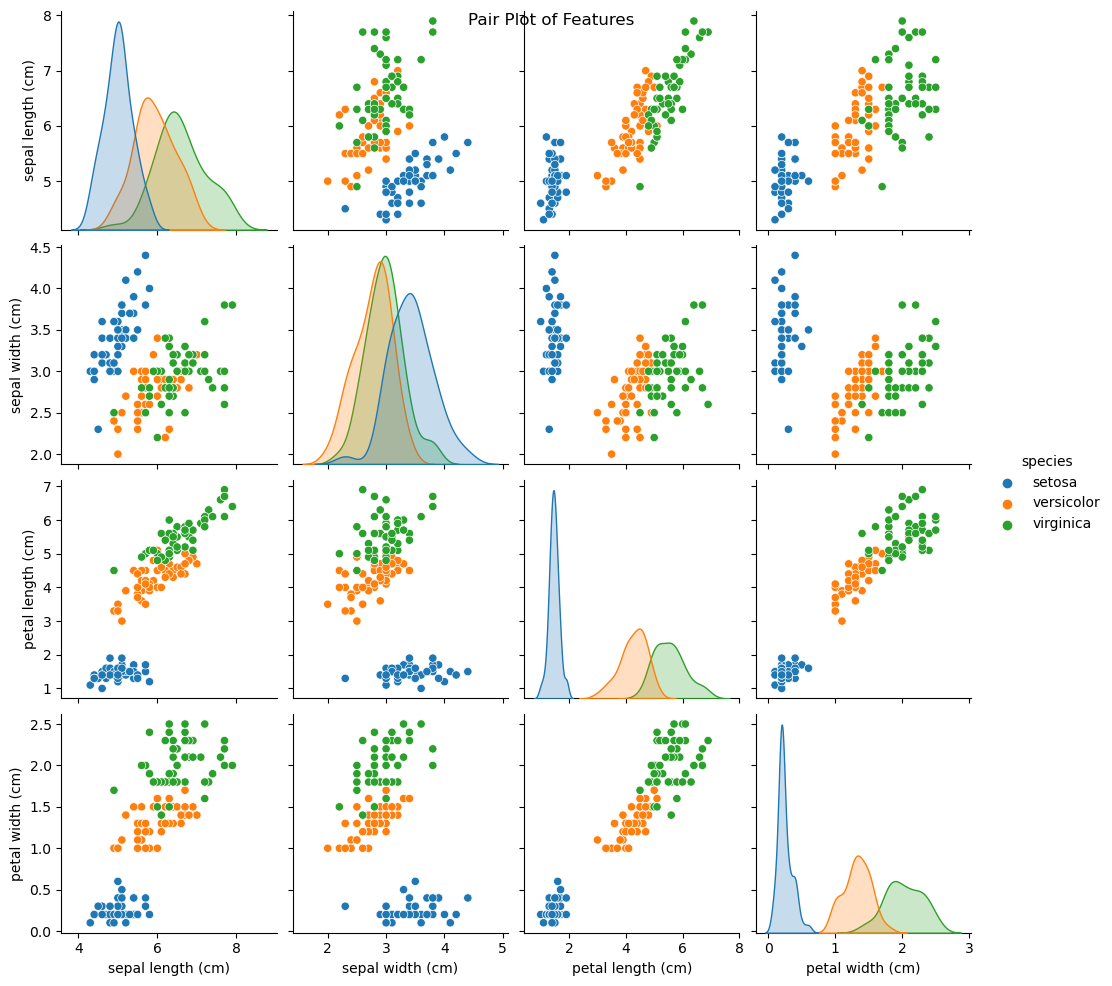

C:\Users\dhiggins\AppData\Local\Temp\ipykernel_75060\984429858.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


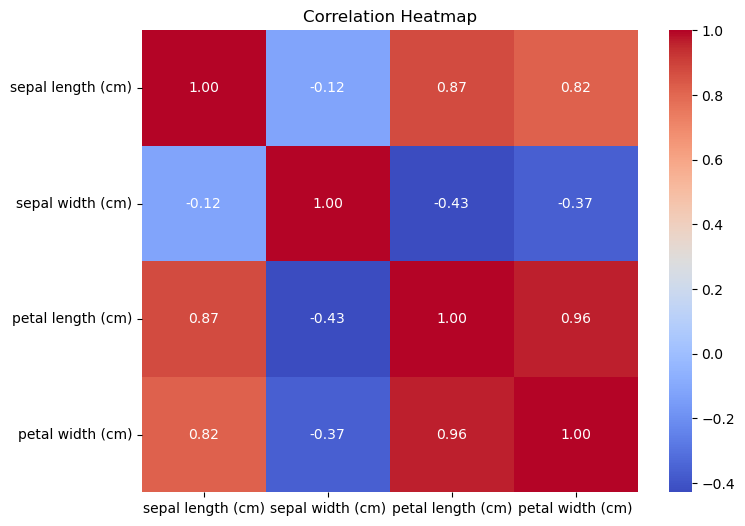

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of each feature
plt.figure(figsize=(12, 6))
plt.suptitle("Feature Distributions")
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue='species', kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Create a pair plot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.suptitle("Pair Plot of Features")
plt.show()

# Create a correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The initial analysis of the dataset show there are no missing values. It will not be necessary to preprocess the dataset using the dropna method to clean the data. These results also suggest that the setosa species is relatively easy to differentiate from the other two species, particularly when considering the petal lengths and widths. The sepal characteristics are less clear but the distribution plots indicate there may a statistically significant difference between setosa and the other two varieties. In each of the pair plots above, a line can be constructed on the plot that would isolate the setosa values from the other varieties completely. The versicolor and virginica show some separation but are intermingled to some degree on each plot. The separation seen between each species indicates that the K Nearest Neighbours classifier may be an appropriate algorithm to use here. We will carry out a t-test to gain more insight on this.

In [4]:
# Separate the data into three groups: setosa, versicolor, and virginica
setosa_data = df[df['species'] == 'setosa']
other_data = df[df['species'].isin(['versicolor', 'virginica'])]

# Perform a t-test between setosa and the other two varieties
t_stat, p_value = stats.ttest_ind(setosa_data['sepal length (cm)'], other_data['sepal length (cm)'], equal_var=False)

print("Results of setosa versus other varieties t-tests:")
# Check the p-value to determine statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"\nReject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = {p_value})")
else:
    print(f"\nFail to reject the null hypothesis: There is no significant difference between setosa and the other two varieties (p-value = {p_value})")

# Perform a t-test between setosa and the other two varieties
t_stat, p_value = stats.ttest_ind(setosa_data['sepal width (cm)'], other_data['sepal width (cm)'], equal_var=False)

# Check the p-value to determine statistical significance
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"\nReject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = {p_value})")
else:
    print(f"\nFail to reject the null hypothesis: There is no significant difference between setosa and the other two varieties (p-value = {p_value})")


    
# Separate the data into versicolor and virginica
versicolor_data = df[df['species'] == 'versicolor']
virginica_data = df[df['species'] == 'virginica']

# List of characteristics to perform t-tests on
characteristics = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

print("\n\n\nResults of virginica and versicolor t-tests:")
# Perform t-tests for each characteristic
for char in characteristics:
    t_stat, p_value = stats.ttest_ind(versicolor_data[char], virginica_data[char], equal_var=False)

    # Check the p-value to determine statistical significance
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"\nCharacteristic: {char}")
        print(f"\nReject the null hypothesis: There is a significant difference (p-value = {p_value})")
    else:
        print(f"\nCharacteristic: {char}")
        print(f"\nFail to reject the null hypothesis: There is no significant difference (p-value = {p_value})")
    print()

Results of setosa versus other varieties t-tests:

Reject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = 7.709331032755147e-32)

Reject the null hypothesis: There is a significant difference between setosa and the other two varieties (p-value = 1.0353958396281789e-13)



Results of virginica and versicolor t-tests:

Characteristic: sepal length (cm)

Reject the null hypothesis: There is a significant difference (p-value = 1.8661443873771216e-07)


Characteristic: sepal width (cm)

Reject the null hypothesis: There is a significant difference (p-value = 0.001819483482104968)


Characteristic: petal length (cm)

Reject the null hypothesis: There is a significant difference (p-value = 4.900287527398095e-22)


Characteristic: petal width (cm)

Reject the null hypothesis: There is a significant difference (p-value = 2.111534400988573e-25)



## Classification Algorithms

Classification algorithms are fundamental in machine learning, serving to categorize data into predefined classes or categories. They are pivotal in numerous real-world applications, such as sentiment analysis, image recognition (e.g., the MNIST dataset), and medical diagnosis (e.g., the Breast Cancer Wisconsin dataset).

These algorithms harness labeled training data to learn the intricate relationships between input features and output classes. Their objective is to construct predictive models capable of accurately assigning new, unlabeled data points to the correct categories. A suite of classification algorithms exists, each with distinct capabilities and suitability for specific tasks.

For instance, logistic regression models class probabilities, decision trees hierarchically partition feature spaces (e.g., the Iris dataset), support vector machines seek optimal hyperplanes for separation, and k-nearest neighbors classify based on proximity. In recent years, deep neural networks (e.g., CNNs for image classification using datasets like CIFAR-10) have made notable strides in handling complex, high-dimensional data.

The selection of a classification algorithm hinges on factors such as data complexity, interpretability requirements, and computational resources. Continual advancements in classification algorithms propel the field of machine learning, enabling automation of decision-making and classification tasks across various domains.

## Synthetic dataset

In [7]:
# Define the feature columns
feature_columns = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]

# Create an empty DataFrame for test cases
test_df = pd.DataFrame(columns=feature_columns)

# Generate 150 test cases
num_test_cases = 150
np.random.seed(42)  # Set a random seed for reproducibility

for _ in range(num_test_cases):
    # Randomly sample feature values from the distribution of the Iris dataset
    random_sample = df.sample(1)[feature_columns].values
    
    # Add random noise to the sampled values to create variability
    noise = np.random.normal(0, 0.2, size=(1, len(feature_columns)))
    test_case = random_sample + noise
    
    # Ensure no negative or zero values in the test case
    test_case[test_case <= 0] = 1
    
    # Append the test case to the test DataFrame
    test_df = pd.concat([test_df, pd.DataFrame(test_case, columns=feature_columns)], ignore_index=True)

# Display the generated test DataFrame
print("Generated Test DataFrame:")
print(test_df.head())

Generated Test DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.993117          2.500989           4.542148          1.348742
1           5.731719          4.035864           1.592675          0.282556
2           4.663285          3.145794           1.432123          1.000000
3           5.856311          3.357311           4.562182          1.895071
4           6.579359          2.822018           5.829925          1.905042


## K Nearest Neighbours

In [6]:
# Define the feature matrix (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with a specified 'k' value (e.g., k=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN classifier: {accuracy:.2f}")

Accuracy of the KNN classifier: 1.00


## Support Vector Machines